In [39]:
import yfinance as yf

# Specify the stock symbol and date range
stock_symbol = "AAPL"  # Replace with your desired stock symbol
start_date = "2022-01-01"
end_date = "2023-11-01"

# Fetch historical data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [40]:
# Calculate MACD values
stock_data['ShortEMA'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
stock_data['LongEMA'] = stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = stock_data['ShortEMA'] - stock_data['LongEMA']
stock_data['Signal'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate MACD Histogram
stock_data['Histogram'] = stock_data['MACD'] - stock_data['Signal']


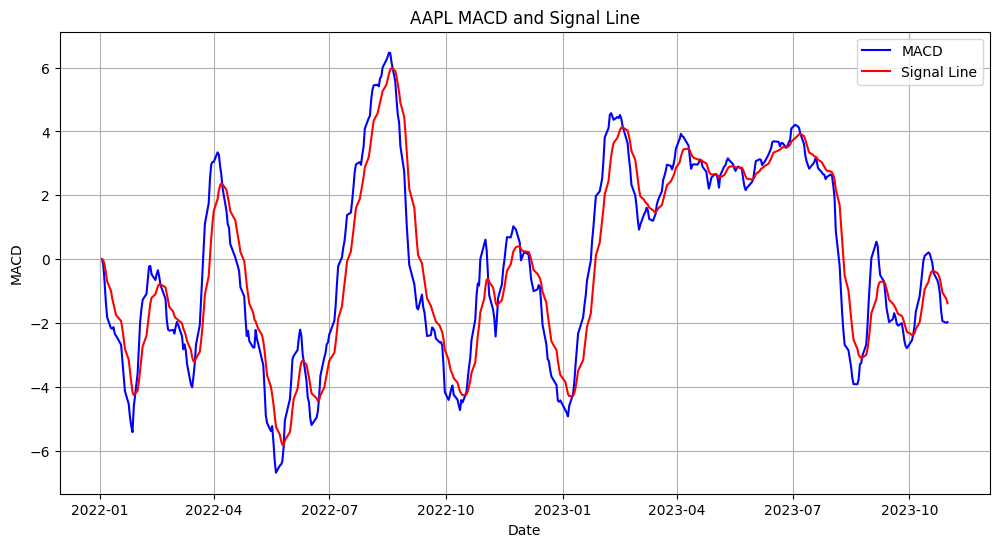

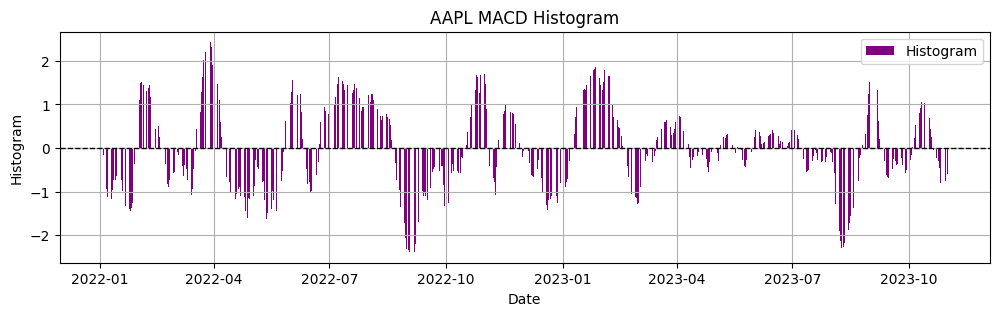

In [41]:
import matplotlib.pyplot as plt

# Plot MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data.index, stock_data['Signal'], label='Signal Line', color='red')
plt.title(f'{stock_symbol} MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid()

# Show the MACD Histogram
plt.figure(figsize=(12, 3))
plt.bar(stock_data.index, stock_data['Histogram'], width=0.7, color='purple', label='Histogram')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title(f'{stock_symbol} MACD Histogram')
plt.xlabel('Date')
plt.ylabel('Histogram')
plt.legend()
plt.grid()

# Display the plots
plt.show()


In [42]:
stock_data['Next_Day_Price'] = stock_data['Close'].shift(-1)

stock_data = stock_data[:-1]

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Create feature matrix (X) and target variable (y)
X = stock_data[['MACD']]  # Include other relevant features
y = stock_data['Next_Day_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [44]:
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 213.82234175665926
Root Mean Squared Error: 14.622665343796228
Mean Absolute Error: 12.495258739132794
R-squared (R2) Score: 0.26281499793243235


In [45]:
# Create a feature vector for the most recent data, including MACD
latest_data = stock_data.iloc[-1][['MACD']]  # Include other relevant features

# Reshape the data to a 2D array (required by the model)
latest_data = latest_data.values.reshape(1, -1)

# Use the trained linear regression model to predict the next day's stock price
next_day_price_prediction = model.predict(latest_data)

print("Predicted Next Day's Stock Price:", next_day_price_prediction[0])


Predicted Next Day's Stock Price: 156.54047686591656


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


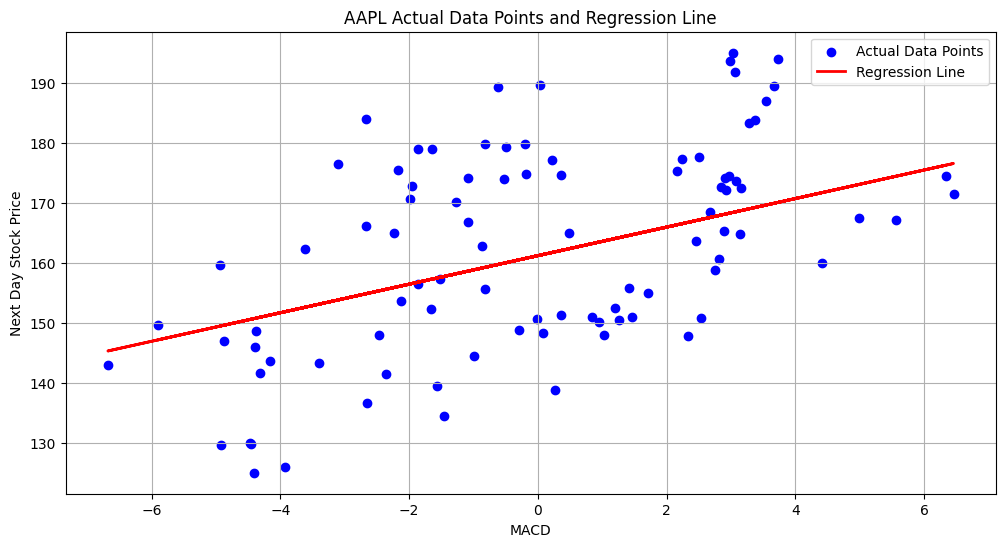

In [46]:
# Plot the actual stock prices
plt.figure(figsize=(12, 6))
plt.scatter(X_test['MACD'], y_test, color='blue', label='Actual Data Points')

# Plot the regression line
plt.plot(X_test['MACD'], y_pred, color='red', linewidth=2, label='Regression Line')

plt.title(f'{stock_symbol} Actual Data Points and Regression Line')
plt.xlabel('MACD')
plt.ylabel('Next Day Stock Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()
